<h2 style="color: #973544;">Libraries</h2>

In [1]:
# 📚 Basic Libraries
import numpy as np
import pandas as pd
import warnings

# 📚 Statistical Testing
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
from sklearn.metrics import classification_report

<h2 style="color: #973544;">Data Extraction</h2>

In [2]:
data = pd.read_csv('salaries.csv')

In [3]:
data.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,Data Management Analyst,172000,USD,172000,US,0,US,M
1,2024,SE,FT,Data Management Analyst,75600,USD,75600,US,0,US,M
2,2024,MI,FT,Data Management Manager,193000,USD,193000,US,0,US,M


In [4]:
data.shape

(19635, 11)

In [5]:
df = data.copy()

<h2 style="color: #973544;">Data Cleaning</h2>

<h3 style="color: #ff6f69;">Duplicates</h3>

In [6]:
df.duplicated().sum()

8194

In [7]:
df.drop_duplicates(inplace=True)

<h3 style="color: #ff6f69">Null values</h3>

In [8]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<h3 style="color: #ff6f69">Empty Spaces</h3>

In [9]:
df.eq(" ").sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<h3 style="color: #ff6f69">Standardize Text</h3>

In [10]:
df.nunique()

work_year                5
experience_level         4
employment_type          4
job_title              148
salary                2906
salary_currency         24
salary_in_usd         3298
employee_residence      88
remote_ratio             3
company_location        78
company_size             3
dtype: int64

In [11]:
df.work_year.unique()

array([2024, 2023, 2022, 2020, 2021])

In [12]:
df.experience_level.unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [13]:
df.remote_ratio.unique()

array([  0, 100,  50])

In [14]:
df.company_size.unique()

array(['M', 'L', 'S'], dtype=object)

In [15]:
df.employee_residence.unique()

array(['US', 'GB', 'CA', 'IE', 'TR', 'IL', 'IN', 'FI', 'DE', 'LU', 'ZA',
       'KE', 'RS', 'PT', 'AR', 'NZ', 'UA', 'LT', 'AU', 'FR', 'ES', 'SE',
       'MX', 'PL', 'NL', 'DK', 'LV', 'GE', 'AT', 'HR', 'BR', 'CH', 'AE',
       'GR', 'SA', 'EG', 'PH', 'OM', 'BA', 'IT', 'EE', 'MT', 'LB', 'RO',
       'HU', 'VN', 'NG', 'CZ', 'PK', 'UG', 'CO', 'SI', 'MU', 'AM', 'TH',
       'KR', 'QA', 'RU', 'TN', 'GH', 'BE', 'AD', 'EC', 'PE', 'MD', 'NO',
       'UZ', 'JP', 'HK', 'CF', 'SG', 'KW', 'CY', 'IR', 'AS', 'CN', 'CR',
       'CL', 'PR', 'BO', 'DO', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'BG', 'JE'],
      dtype=object)

In [16]:
df.company_location.unique()

array(['US', 'GB', 'CA', 'IE', 'TR', 'IL', 'IN', 'FI', 'DE', 'LU', 'ZA',
       'KE', 'RS', 'PT', 'AR', 'GR', 'NZ', 'UA', 'LT', 'AU', 'FR', 'ES',
       'SE', 'MX', 'PL', 'NL', 'DK', 'LV', 'AT', 'BR', 'CH', 'AE', 'SA',
       'EG', 'PH', 'OM', 'BA', 'IT', 'AS', 'EE', 'MT', 'HU', 'LB', 'RO',
       'VN', 'NG', 'GI', 'CO', 'SI', 'MU', 'RU', 'KR', 'CZ', 'QA', 'GH',
       'AD', 'EC', 'NO', 'JP', 'HK', 'CF', 'SG', 'TH', 'HR', 'AM', 'PK',
       'IR', 'BS', 'PR', 'BE', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'CN', 'CL',
       'MD'], dtype=object)

In [17]:
pd.set_option('display.max_rows', None)
df.job_title.value_counts()

job_title
Data Scientist                              2443
Data Engineer                               2061
Data Analyst                                1562
Machine Learning Engineer                   1182
Research Scientist                           452
Analytics Engineer                           392
Data Architect                               318
Research Engineer                            273
Business Intelligence Analyst                215
Applied Scientist                            181
AI Engineer                                  137
Data Manager                                 133
Research Analyst                             130
Business Intelligence                        127
Business Intelligence Engineer               121
Machine Learning Scientist                   118
Data Specialist                               94
BI Developer                                  76
Data Analytics Manager                        58
Business Intelligence Developer               57
Head of Da

In [18]:
df.job_title.replace({'Machine Learning Engineer':'ML Engineer',
                      'Machine Learning Software Engineer':'ML Engineer',
                      'Machine Learning Quality Engineer ':'ML Engineer',
                      'Machine Learning Scientist':'ML Engineer',
                      'Machine Learning Specialist':'ML Engineer',
                      'Machine Learning Infrastructure Engineer':'ML Engineer',
                      'Machine Learning Quality Engineer':'ML Engineer',
                      'Staff Machine Learning Engineer':'ML Engineer',
                      
                      'Machine Learning Operations Engineer':'ML Operations Engineer',
                      'MLOps Engineer':'ML Operations Engineer',
                      
                      'Machine Learning Developer':'ML Developer',
                      'Applied Machine Learning Engineer':'ML Developer',
                      'Applied Machine Learning Scientist':'ML Developer',
                      'ML Modeler':'ML Developer',
                      'Machine Learning Modeler':'ML Developer',
                      'Big Data Developer':'ML Developer',

                      
                      'Lead Machine Learning Engineer':'ML Manager',
                      'Machine Learning Manager':'ML Manager',
                      'Head of Machine Learning':'ML Manager',
                      'Principal Machine Learning Engineer':'ML Engineer',
                      
                      'Machine Learning Researcher':'ML Researcher',
                      'Machine Learning Research Engineer':'ML Researcher',
                      
                      
                      'AI Software Development Engineer':'AI Engineer',
                      'AI Software Engineer':'AI Engineer',
                      'AI Programmer':'AI Engineer',
                      'Deep Learning Engineer':'AI Engineer',
                      
                      
                      'Lead AI Engineer':'AI Manager',
                      'AI Product Manager':'AI Manager',
                      'AI Manager':'AI Manager',
                      
                      'AI Research Scientist':'AI Researcher',
                      'AI Research Engineer':'AI Researcher',
                      'Deep Learning Researcher':'AI Researcher',
          
                      
                      'Business Intelligence Analyst':'BI Analyst',
                      'Business Intelligence':'BI Analyst',
                      'BI Data Analyst':'BI Analyst',
                      'Business Intelligence Specialist':'BI Analyst',
                      'Business Intelligence Data Analyst':'BI Analyst',
                      'Business Data Analyst':'BI Analyst',
                      
                      'Business Intelligence Engineer':'BI Engineer',
                      'BI Data Engineer':'BI Engineer',
                      
                      'Business Intelligence Developer':'BI Developer',
                      'Power BI Developer':'BI Developer',
                      'ETL Developer':'BI Developer',
                      
                      'Director of Business Intelligence':'BI Manager',
                      'Business Intelligence Manager':'BI Manager',
                      'Business Intelligence Lead':'BI Manager',
      
                      
                      'Sales Data Analyst':'Data Analyst',
                      'Marketing Data Analyst':'Data Analyst',
                      'Data Quality Analyst':'Data Analyst',
                      'Product Data Analyst':'Data Analyst',
                      'Financial Data Analyst':'Data Analyst',
                      'Finance Data Analyst':'Data Analyst',
                      'Staff Data Analyst':'Data Analyst',
                      'Data Analytics Associate':'Data Analyst',
                      'CRM Data Analyst':'Data Analyst',
                      'Admin & Data Analyst':'Data Analyst',
                      'Compliance Data Analyst':'Data Analyst',
                      'Data Reporting Analyst':'Data Analyst',
                      'Data Analytics Specialist':'Data Analyst',
                      'Data Analytics Consultant':'Data Analyst',
                      
                      
                      
                      'Data Pipeline Engineer':'Data Engineer',
                      'DataOps Engineer':'Data Engineer',
                      'Analytics Engineer':'Data Engineer',
                      'Data Engineer 2':'Data Engineer',
                      'Data Infrastructure Engineer':'Data Engineer',
                      'Big Data Engineer':'Data Engineer',
                      'Software Data Engineer':'Data Engineer',
                      'Principal Data Engineer':'Data Engineer',
                      'Marketing Data Engineer':'Data Engineer',                      
                      'Consultant Data Engineer':'Data Engineer',
                      'Data Integration Engineer':'Data Engineer',
                      'Data Quality Engineer':'Data Engineer',
                      
                      'Data Analytics Engineer':'Data Engineer',
                      'Data Science Engineer':'Data Engineer',
                      'ETL Engineer':'Data Engineer',
                      'Data Integration Specialist':'Data Engineer',
                      'Data Integration Developer':'Data Engineer',
                      'Prompt Engineer':'Data Engineer',
                      
                      'Data Operations Specialist':'Data Operations Engineer',
                      'Data Operations Engineer':'Data Operations Engineer',
                      'Data DevOps Engineer':'Data Operations Engineer',
                      'Data Operations Analyst':'Data Operations Engineer',
                      
                      
                      'Data Science Consultant':'Data Scientist',                      
                      'Data Specialist':'Data Scientist',
                      'Marketing Data Scientist':'Data Scientist',      
                      'Data Science':'Data Scientist',
                      'Staff Data Scientist':'Data Scientist',
                      'Data Science Practitioner':'Data Scientist',
                      'Applied Data Scientist':'Data Scientist',
                      'Insight Analyst':'Data Scientist',
                      
                      

                      'Manager Data Management':'Data Management Manager',
                      'Data Management Consultant':'Data Management Manager',
                      'Encounter Data Management Professional':'Data Management Manager',
                      'Data Strategy Manager':'Data Management Manager',
                      'Data Management Specialist':'Data Management Manager',
                      'Data Operations Manager':'Data Management Manager',
                      'Data Quality Manager':'Data Management Manager',
                      'Data Modeller':'Data Management Manager',
                      'Data Modeler':'Data Management Manager',
                      
                      'Data Scientist Lead':'Data Scientist Manager',
                      'Data Science Lead':'Data Scientist Manager',
                      'Data Science Tech Lead':'Data Scientist Manager',
                      'Data Lead':'Data Scientist Manager',
                      'Data Science Director':'Data Scientist Manager',
                      'Head of Data Science':'Data Scientist Manager',
                      'Managing Director Data Science':'Data Scientist Manager',
                      'Head of Data':'Data Scientist Manager',
                      'Director of Data Science':'Data Scientist Manager',
                      'Lead Data Scientist':'Data Scientist Manager',
                      'Principal Data Scientist':'Data Scientist Manager',
                      'Data Operations Associate':'Data Scientist Manager',
                      'Data Science Manager':'Data Scientist Manager',
                      
                      'Director of Data Engineering':'Data Engineering Manager',
                      'Analytics Engineering Manager':'Data Engineering Manager',
                      'Lead Data Engineer':'Data Engineering Manager',
                      
                      
                      'Data Analyst Lead':'Data Analyst Manager',
                      'Data Analytics Lead':'Data Analyst Manager',
                      'Principal Data Analyst':'Data Analyst Manager',
                      'Master Data Specialist':'Data Analyst Manager', 
                      'Lead Data Analyst':'Data Manager',
                      'Data Analytics Manager':'Data Manager',

                  

                      'Applied Research Scientist':'Research Scientist',
                      'Research Engineer':'Research Scientist',
                      'Quantitative Research Analyst':'Research Scientist',
                      '3D Computer Vision Researcher':'Research Scientist',
                      'Research Analyst':'Research Scientist',
                      'Principal Statistical Programmer':'Research Scientist',
                      'Computational Biologist':'Research Scientist',
                      
                      
                      'Data Visualization Analyst':'Data Visualization Engineer',
                      'Data Visualization Developer':'Data Visualization Engineer',
                      'Data Visualization Specialist':'Data Visualization Engineer',
                      'Computer Vision Engineer':'Data Visualization Engineer',
                      'Computer Vision Software Engineer':'Data Visualization Engineer',
                      
                      'Cloud Data Architect':'Data Architect',
                      'Principal Data Architect':'Data Architect',
                      'AWS Data Architect':'Data Architect',
                      'Big Data Architect':'Data Architect',
                      'Cloud Database Engineer':'Data Architect',
                      'Azure Data Engineer':'Data Architect',
                      'Cloud Data Engineer':'Data Architect',

                      'Robotics Software Engineer':'Robotics Engineer',
                      'Bear Robotics':'Robotics Engineer',
                      'Autonomous Vehicle Technician':'Robotics Engineer',
    
                     
                     },inplace=True)

In [19]:
df.job_title.value_counts()

job_title
Data Engineer                  2582
Data Scientist                 2571
Data Analyst                   1635
ML Engineer                    1356
Research Scientist              863
BI Analyst                      434
Data Architect                  348
Data Manager                    197
Applied Scientist               181
AI Engineer                     166
BI Developer                    157
BI Engineer                     122
Data Scientist Manager          112
Data Management Manager          95
Data Visualization Engineer      79
Data Operations Engineer         50
Data Product Manager             38
ML Operations Engineer           37
BI Manager                       36
ML Developer                     36
Data Analyst Manager             35
AI Architect                     33
Robotics Engineer                32
AI Scientist                     30
ML Researcher                    29
Data Developer                   27
AI Developer                     25
Data Management An

In [20]:
df['salary_euro'] = df['salary_in_usd'] * 0.924

In [21]:
df.drop(columns=['salary','salary_currency','salary_in_usd'],inplace=True)

In [22]:
df.reset_index(drop=True, inplace=True)

In [23]:
df.to_csv('clean_data.csv')

<h2 style="color: #973544;">Exploratory Data Analysis (EDA)</h2>

<h3 style="color: #ff00ff;">Descriptive Statistic</h3>

In [24]:
df.describe()

,work_year,remote_ratio,salary_euro
count,11441.000000,11441.000000,11441.000000
mean,2023.327681,34.131632,136524.399764
std,0.777779,46.837576,67556.552526
min,2020.000000,0.000000,13860.000000
25%,2023.000000,0.000000,87872.400000
50%,2023.000000,0.000000,128436.000000
75%,2024.000000,100.000000,173712.000000
max,2024.000000,100.000000,739200.000000


<h3 style="color: #ff00ff;">Univariate Analysis</h3>

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11441 entries, 0 to 11440
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           11441 non-null  int64  
 1   experience_level    11441 non-null  object 
 2   employment_type     11441 non-null  object 
 3   job_title           11441 non-null  object 
 4   employee_residence  11441 non-null  object 
 5   remote_ratio        11441 non-null  int64  
 6   company_location    11441 non-null  object 
 7   company_size        11441 non-null  object 
 8   salary_euro         11441 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 804.6+ KB


<h3 style="color: #ff6f69">Work Year</h3>

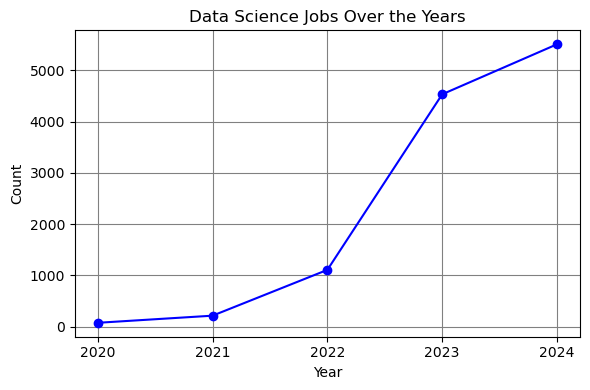

In [26]:
year_counts = df['work_year'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.plot(year_counts.index, year_counts.values, marker='o', color='b', linestyle='-')
plt.title('Data Science Jobs Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True,color='grey')

plt.xticks(year_counts.index)
plt.tight_layout()
plt.show()

<h3 style="color: #ff6f69">Salary</h3>

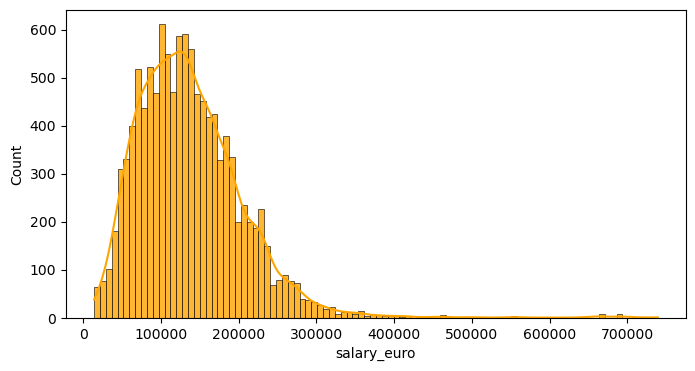

In [27]:
plt.figure(figsize=(8, 4))
sns.histplot(df["salary_euro"], alpha=0.8,color='orange', kde=True);

In [28]:
df.describe()

,work_year,remote_ratio,salary_euro
count,11441.000000,11441.000000,11441.000000
mean,2023.327681,34.131632,136524.399764
std,0.777779,46.837576,67556.552526
min,2020.000000,0.000000,13860.000000
25%,2023.000000,0.000000,87872.400000
50%,2023.000000,0.000000,128436.000000
75%,2024.000000,100.000000,173712.000000
max,2024.000000,100.000000,739200.000000


<h3 style="color: #ff6f69">Experienve, Employment Type, Remote Ratio, Company Size</h3>

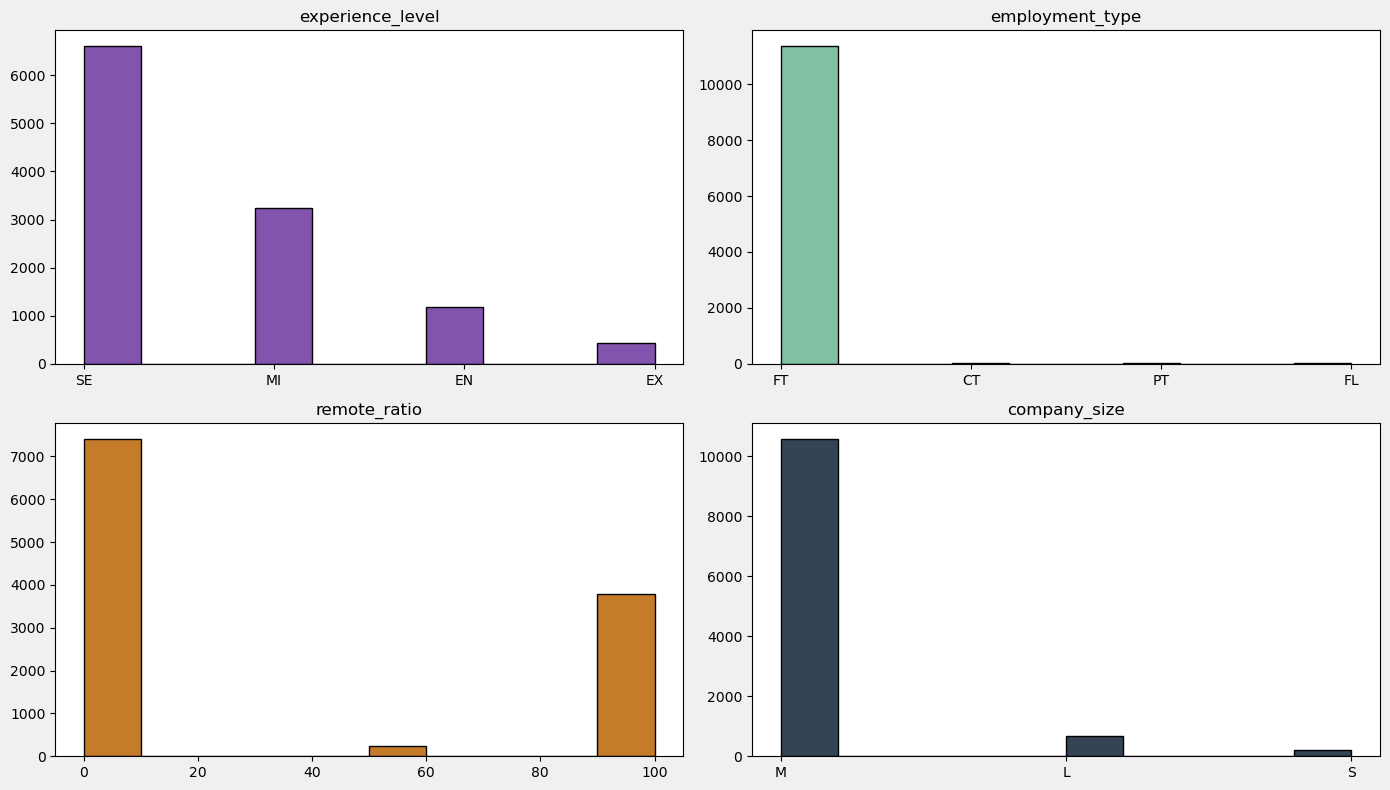

In [29]:
color_palette = ['#8354ad', '#80c0a3', '#c47c2b','#344454']  # Specify colors for each plot
background_color = '#F0F0F0'

# Features to plot
features_to_plot = ['experience_level','employment_type', 'remote_ratio','company_size']

# grid size
nrows, ncols = 2, 2  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 8), facecolor=background_color)
axes = axes.flatten()

# Plot each feature with a specific color
for i, (feature, color) in enumerate(zip(features_to_plot, color_palette)):
    ax = axes[i]
    if feature in df.columns:
        ax.hist(df[feature], bins=10, color=color, edgecolor='black')
        ax.set_title(feature)
    else:
        ax.set_visible(False)  # Hide the plot if the feature is not in the DataFrame

plt.tight_layout()
plt.show()

In [30]:
crosstab_result = pd.crosstab(df['company_size'], df['experience_level'])
crosstab_result

experience_level,EN,EX,MI,SE
company_size,,,,
L,128,22,225,290
M,999,396,2937,6250
S,51,8,71,64


In [31]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(167.71403381501815, 1.3733022189400326e-33)

In [32]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.08561260496236733

<h3 style="color: #ff6f69">Top 20 Job Titles</h3>

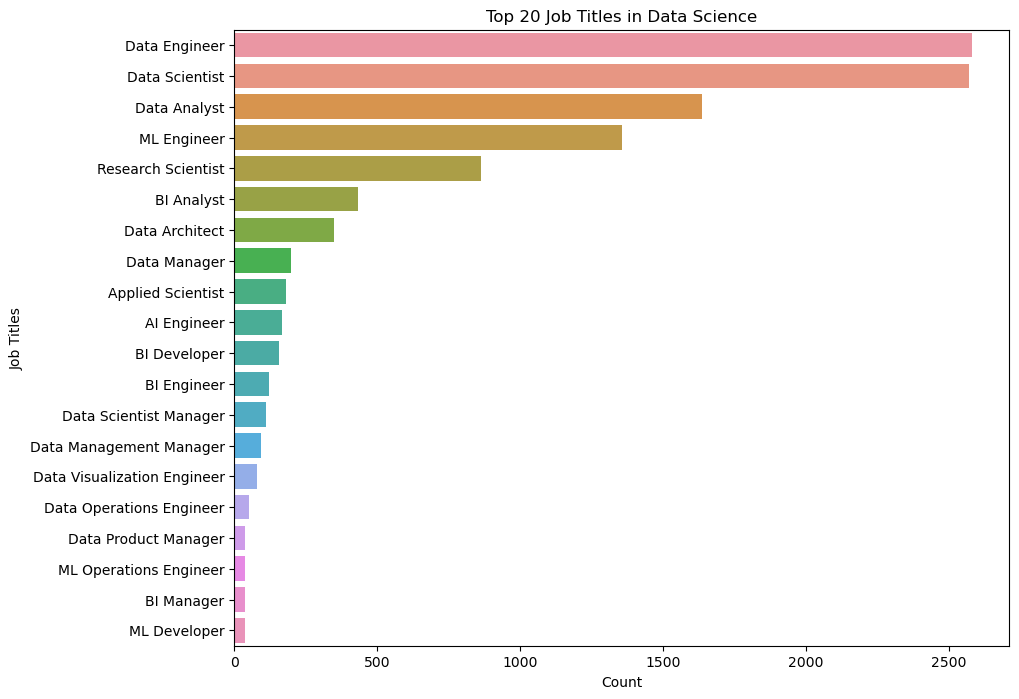

In [33]:
plt.figure(figsize=(10,8))
plt.title('Top 20 Job Titles in Data Science')

# Get the top 10 job titles
top_20_job_titles = df['job_title'].value_counts().nlargest(20).index

sns.countplot(y='job_title', data=df, order=top_20_job_titles)
plt.xlabel('Count')
plt.ylabel('Job Titles')
plt.show()

<h3 style="color: #ff6f69">Top 10 Job Titles by Ave. Salary</h3>

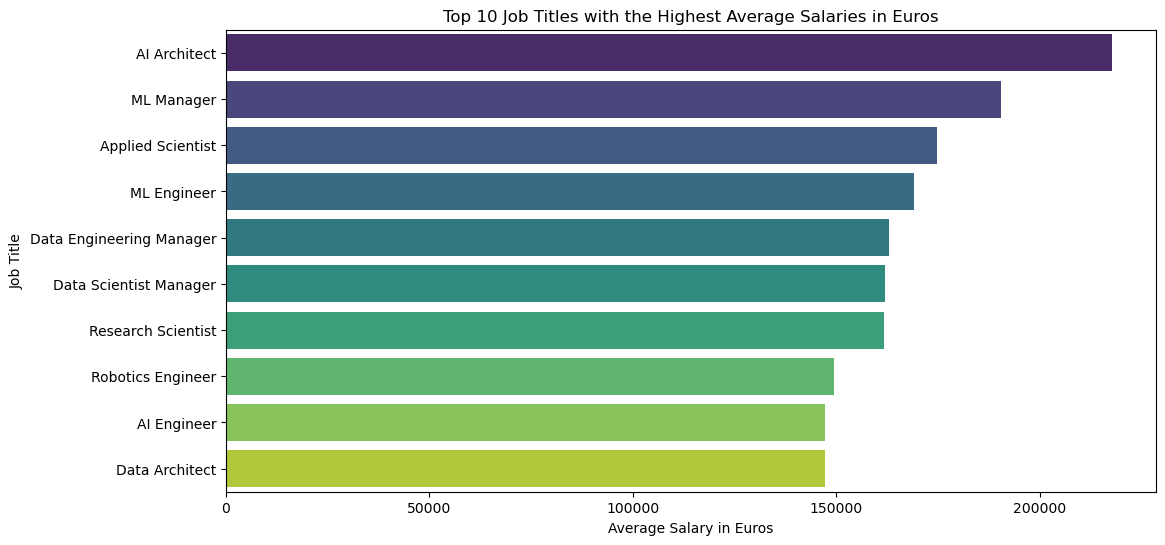

In [34]:
job_title_salary = df.groupby('job_title')['salary_euro'].mean()

# Sort the job titles by mean salary and select the top 10 highest
job_title_salary = job_title_salary.sort_values(ascending=False).head(10)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=job_title_salary.values, y=job_title_salary.index, palette='viridis')
plt.xlabel('Average Salary in Euros')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles with the Highest Average Salaries in Euros')
plt.show()

<h3 style="color: #ff6f69">Company Location</h3>

<h3 style="color: #ff00ff;">Bivariate Analysis</h3>

<h3 style="color: #ff6f69">Experience level & Company size</h3>

<Axes: xlabel='company_size', ylabel='count'>

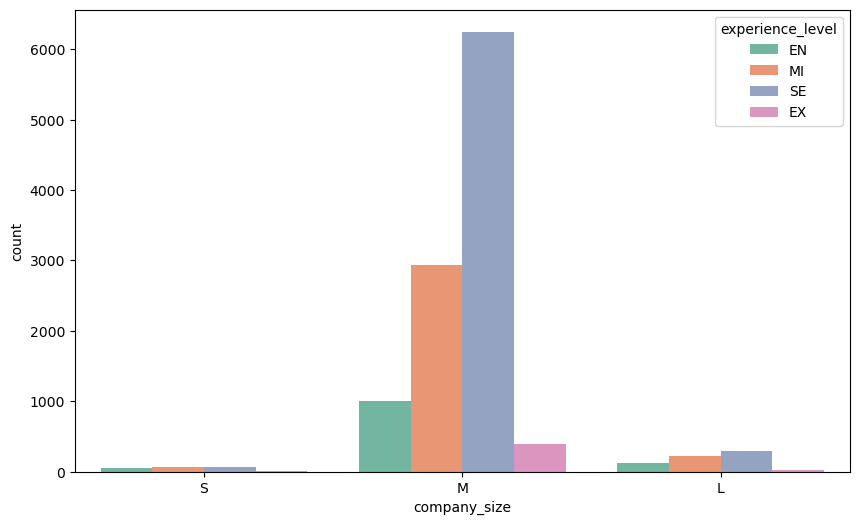

In [35]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=0)
sns.countplot(data=df, x='company_size', hue='experience_level', order=['S', 'M', 'L'],hue_order=['EN','MI','SE','EX'], palette='Set2',)

<h3 style="color: #ff6f69">Remote Ratio Over Years</h3>

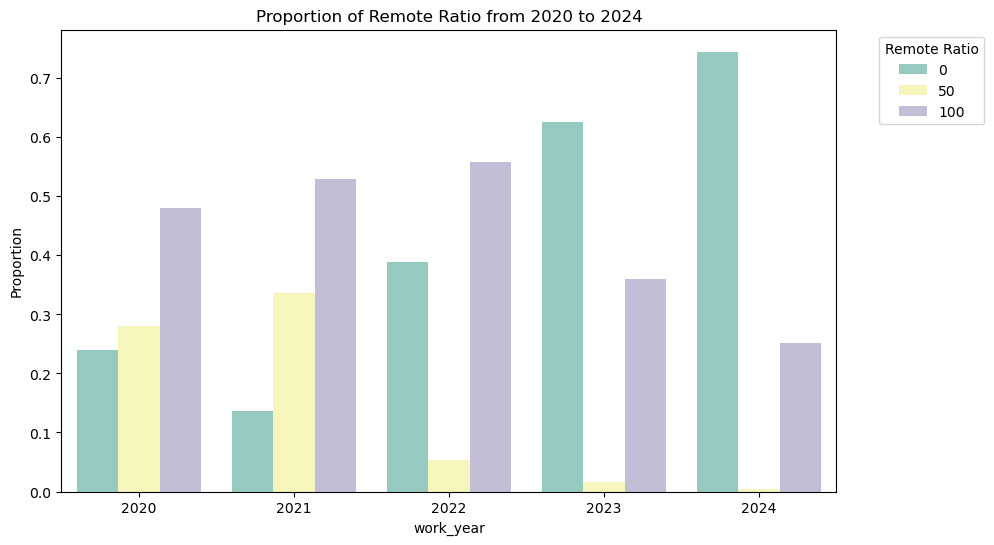

In [36]:
proportions = df.groupby(['work_year', 'remote_ratio']).size().reset_index(name='count')
proportions['proportion'] = proportions.groupby('work_year')['count'].transform(lambda x: x / x.sum())

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='work_year', y='proportion', hue='remote_ratio', data=proportions, palette='Set3')
plt.title('Proportion of Remote Ratio from 2020 to 2024')
plt.xticks(rotation=0)
plt.legend(title='Remote Ratio', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.ylabel('Proportion')
plt.show()

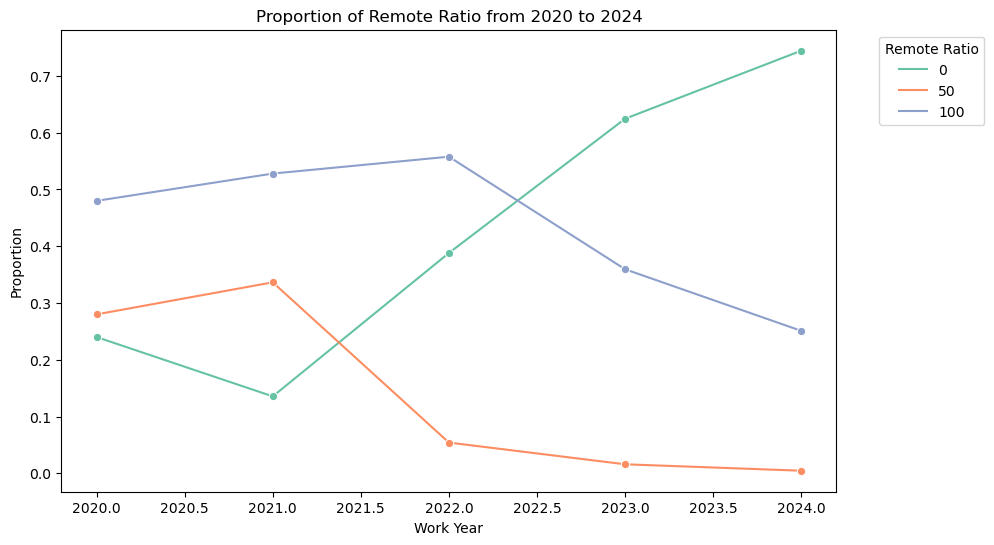

In [37]:
proportions = df.groupby(['work_year', 'remote_ratio']).size().reset_index(name='count')
proportions['proportion'] = proportions.groupby('work_year')['count'].transform(lambda x: x / x.sum())

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='work_year', y='proportion', hue='remote_ratio', data=proportions, palette='Set2', marker='o')

# Enhancing the plot
plt.title('Proportion of Remote Ratio from 2020 to 2024')
plt.xticks(rotation=0)
plt.legend(title='Remote Ratio', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.ylabel('Proportion')
plt.xlabel('Work Year')
plt.show()

<h3 style="color: #ff6f69">Experience level & Salary</h3>

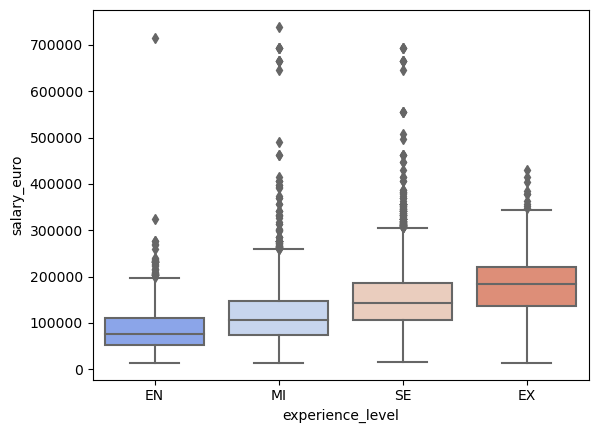

In [38]:
experience_order = ['EN', 'MI', 'SE', 'EX']
sns.boxplot(data=df, x='experience_level', y='salary_euro', palette="coolwarm", order=experience_order)
plt.show()

<h3 style="color: #ff6f69">Salary by Job Title and Experience level</h3>

Text(0.5, 1.0, 'Data Science Jobs Salary By Experiance Level')

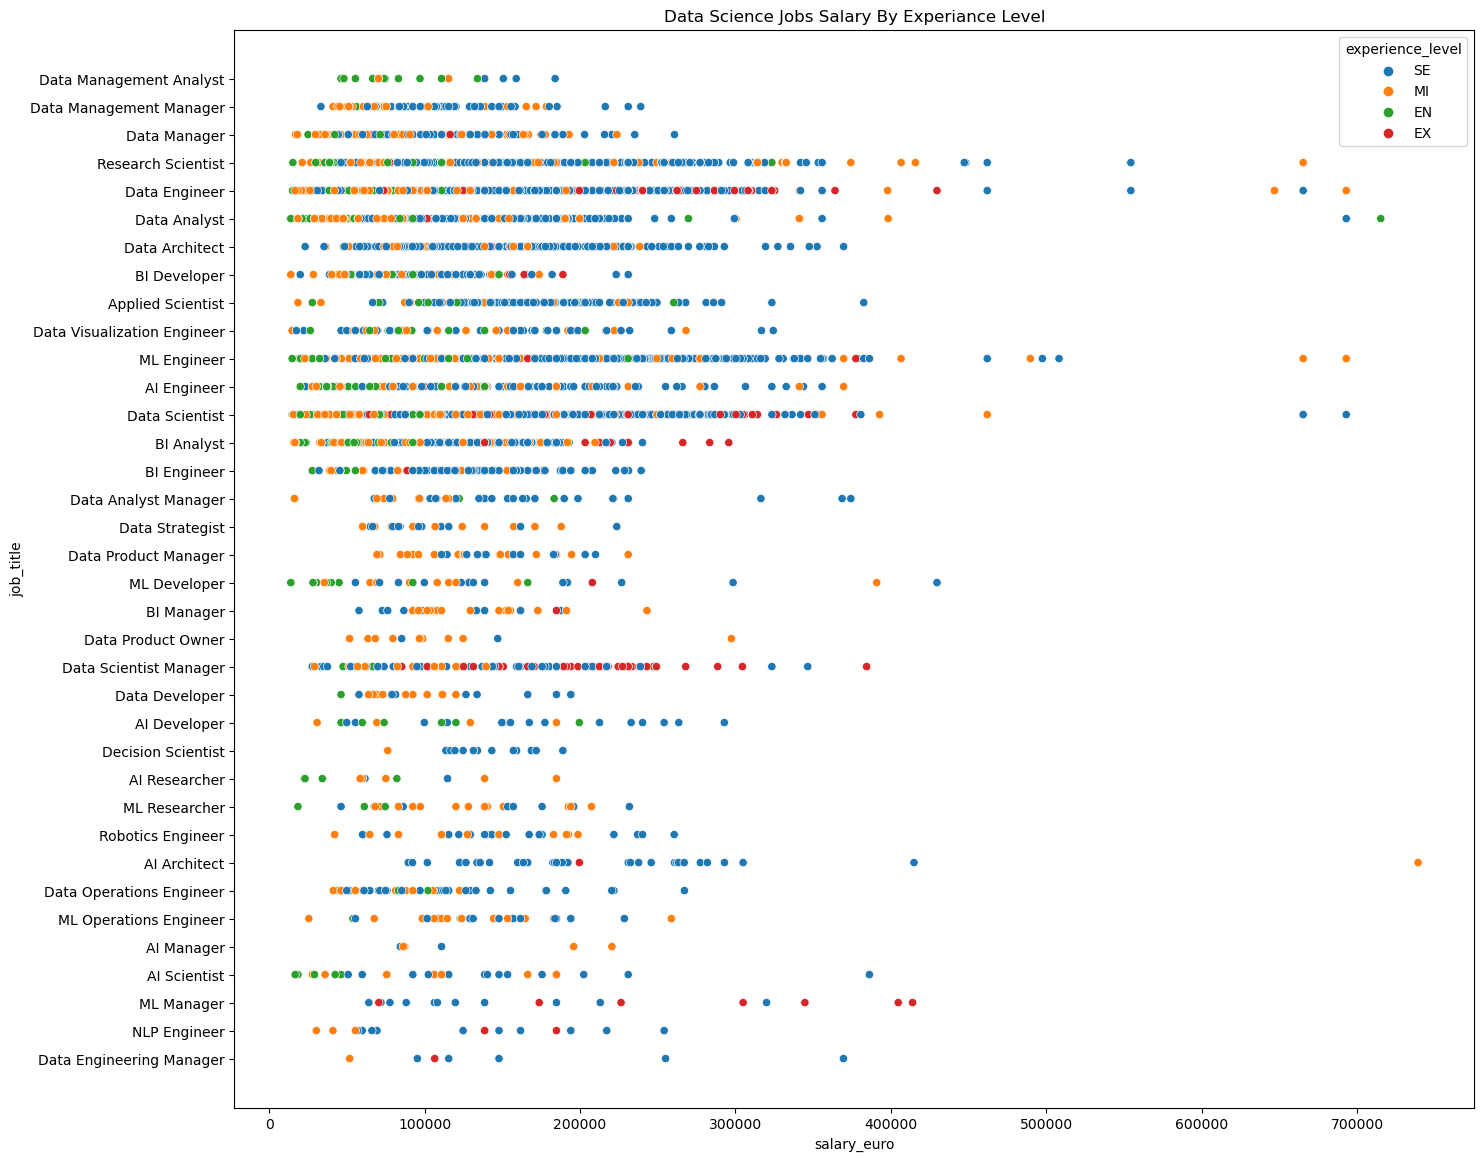

In [39]:
plt.figure(figsize=(16, 14))
sns.scatterplot(data=df, x='salary_euro', y='job_title',hue='experience_level')
plt.title('Data Science Jobs Salary By Experiance Level')

In [40]:
df[df['job_title'].str.contains('Data Analyst') & (df['salary_euro'] > 700000)]

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_euro
4361,2024,EN,FT,Data Analyst,MX,0,MX,M,715176.0


/Users/negarmokhtari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


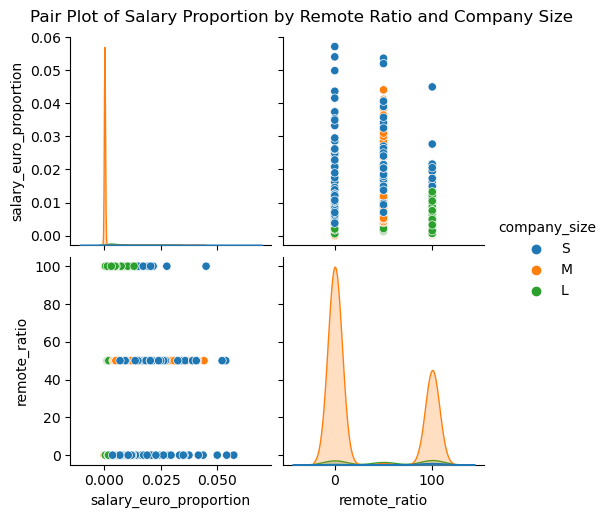

In [41]:
grouped_df = df.groupby(['remote_ratio', 'company_size'])['salary_euro'].sum().reset_index()
grouped_df.columns = ['remote_ratio', 'company_size', 'total_salary_euro']

# Ensure the original DataFrame does not have a conflicting 'total_salary_euro' column
if 'total_salary_euro' in df.columns:
    df = df.drop(columns=['total_salary_euro'])

# Merge the total salary back to the original DataFrame
df = pd.merge(df, grouped_df, on=['remote_ratio', 'company_size'])

# Calculate the proportion of salary within each group
df['salary_euro_proportion'] = df['salary_euro'] / df['total_salary_euro']

# Convert 'company_size' to a categorical type with a specific order
df['company_size'] = pd.Categorical(df['company_size'], categories=['S', 'M', 'L'], ordered=True)

# Create a pair plot using the proportion of salary
sns.pairplot(df[["salary_euro_proportion", "remote_ratio", "company_size"]], hue='company_size')
plt.suptitle('Pair Plot of Salary Proportion by Remote Ratio and Company Size', y=1.02)
plt.show()

/Users/negarmokhtari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


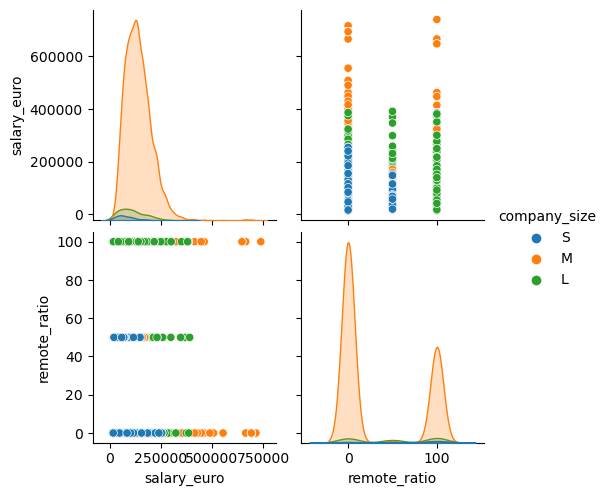

In [42]:
sns.pairplot(df[["salary_euro", "remote_ratio","company_size"]], hue='company_size')

<h3 style="color: #ff6f69">Company Location & Employee Residence</h3>

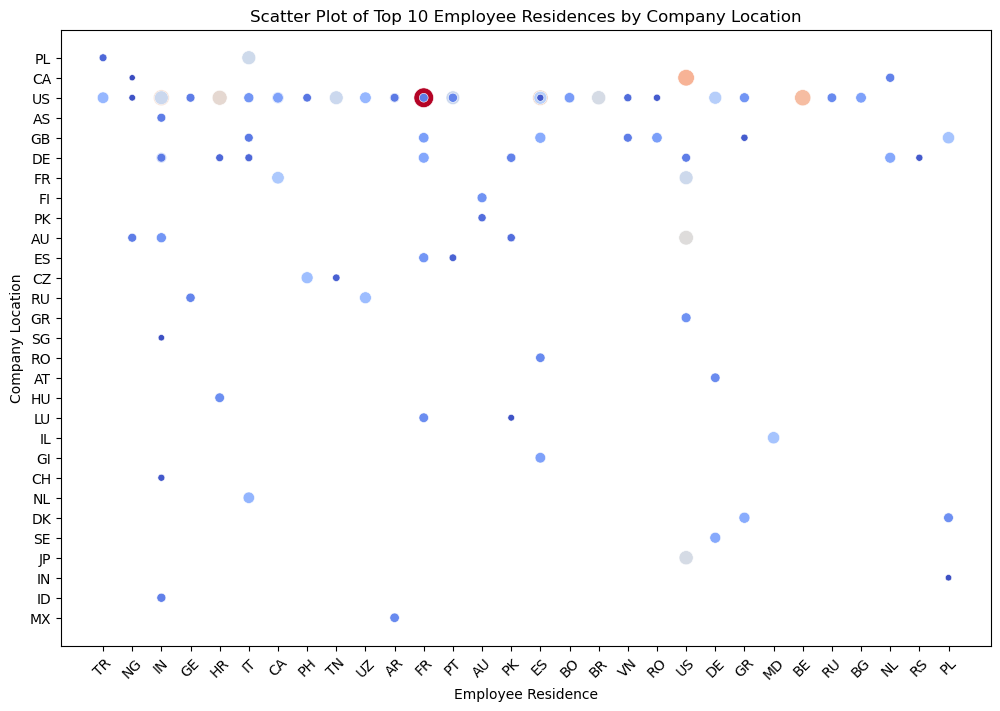

In [43]:
diff_location = df.loc[~(df['employee_residence'] == df['company_location'])]

# Get the top 10 employee residences by count
top_10_employee_residences = diff_location['employee_residence'].value_counts().nlargest(30).index

# Filter the DataFrame to include only the top 10 employee residences
top_10_diff_location = diff_location[diff_location['employee_residence'].isin(top_10_employee_residences)]

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_10_diff_location, x='employee_residence', y='company_location', hue='salary_euro', palette="coolwarm", size='salary_euro', sizes=(20, 200), legend=False)

plt.title('Scatter Plot of Top 10 Employee Residences by Company Location')
plt.xlabel('Employee Residence')
plt.ylabel('Company Location')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='company_size', ylabel='salary_euro'>

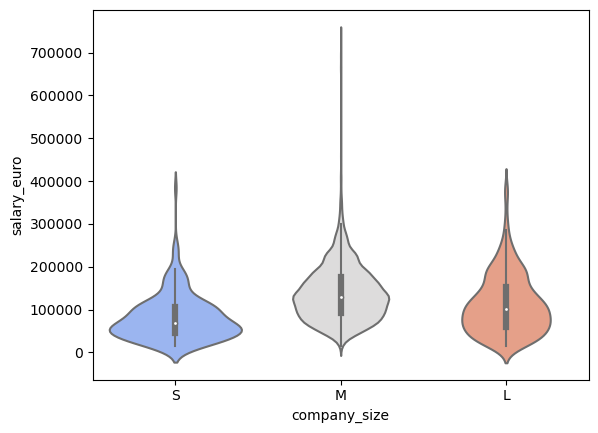

In [44]:
sns.violinplot(data=df, x='company_size', y='salary_euro', palette="coolwarm")

<h2 style="color: #8b0a50;">Machine Learning</h2>

In [45]:
df.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_euro,total_salary_euro,salary_euro_proportion
0,2024,SE,FT,Data Management Analyst,US,0,US,M,158928.0,1.003857e+09,0.000158
1,2024,SE,FT,Data Management Analyst,US,0,US,M,69854.4,1.003857e+09,0.000070
2,2024,MI,FT,Data Management Manager,US,0,US,M,178332.0,1.003857e+09,0.000178
3,2024,MI,FT,Data Management Manager,US,0,US,M,78170.4,1.003857e+09,0.000078
4,2024,MI,FT,Data Management Manager,US,0,US,M,113652.0,1.003857e+09,0.000113


In [46]:
df.company_size.value_counts()

company_size
M    10582
L      665
S      194
Name: count, dtype: int64

In [47]:
df.drop(columns=["total_salary_euro","salary_euro_proportion"], inplace=True)

In [48]:
df[df['job_title'].str.contains('Data Analyst') & (df['salary_euro'] > 700000)]

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_euro
3184,2024,EN,FT,Data Analyst,MX,0,MX,M,715176.0


In [49]:
df = df.drop(index=3184)

<h3 style="color: #ff00ff;">Experience</h3>

In [50]:
df["experience_level_enc"] = df["experience_level"].map({"EN": 0, "MI": 1,"SE":2,"EX":3})

In [51]:
df.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_euro,experience_level_enc
0,2024,SE,FT,Data Management Analyst,US,0,US,M,158928.0,2
1,2024,SE,FT,Data Management Analyst,US,0,US,M,69854.4,2
2,2024,MI,FT,Data Management Manager,US,0,US,M,178332.0,1
3,2024,MI,FT,Data Management Manager,US,0,US,M,78170.4,1
4,2024,MI,FT,Data Management Manager,US,0,US,M,113652.0,1


In [52]:
df.drop(columns=["experience_level"], inplace=True)

<h3 style="color: #ff00ff;">Employment Type</h3>

In [53]:
df["employment_type_enc"] = df["employment_type"].map({"FL": 0, "CT": 1,"PT":2,"FT":3})

In [54]:
df.drop(columns=["employment_type"], inplace=True)

<h3 style="color: #ff00ff;">Comany Size</h3>

In [55]:
df["company_size_enc"] = df["company_size"].map({"S": 0, "M": 1,"L":2})

In [56]:
df["company_size_enc"] = pd.to_numeric(df["company_size_enc"])

In [57]:
df.drop(columns=["company_size"], inplace=True)

<h3 style="color: #ff00ff;">Company Location</h3>

In [58]:
df["company_continent"] = df["company_location"].map({
    'US': 'North America', 'CA': 'North America', 'MX': 'North America', 'PR': 'North America', 'AS': 'North America','BS':'North America',
    'UK': 'Europe', 'DE': 'Europe', 'ES': 'Europe', 'FR': 'Europe', 'PT': 'Europe', 'NL': 'Europe', 'GR': 'Europe',
    'IE': 'Europe', 'IT': 'Europe', 'PL': 'Europe', 'LT': 'Europe', 'LV': 'Europe', 'UA': 'Europe', 'EE': 'Europe',
    'AT': 'Europe', 'CH': 'Europe', 'RU': 'Europe', 'TR': 'Europe', 'SI': 'Europe', 'DK': 'Europe', 'FI': 'Europe',
    'BE': 'Europe', 'RO': 'Europe', 'LU': 'Europe', 'SE': 'Europe', 'CZ': 'Europe', 'HU': 'Europe', 'HR': 'Europe',
    'NO': 'Europe', 'MT': 'Europe', 'CF': 'Europe', 'AD': 'Europe', 'RS': 'Europe', 'GI': 'Europe', 'MD': 'Europe',
    'AM': 'Europe', 'IN': 'Asia', 'JP': 'Asia', 'SG': 'Asia', 'PH': 'Asia', 'SA': 'Asia', 'IL': 'Asia', 'PK': 'Asia',
    'TH': 'Asia', 'VN': 'Asia', 'KR': 'Asia', 'ID': 'Asia', 'LB': 'Asia', 'IR': 'Asia', 'CN': 'Asia', 'HK': 'Asia',
    'QA': 'Asia', 'IQ': 'Asia', 'OM': 'Asia', 'MY': 'Asia', 'BR': 'South America', 'CO': 'South America',
    'AR': 'South America', 'CL': 'South America', 'EC': 'South America', 'HN': 'South America', 'NG': 'Africa',
    'ZA': 'Africa', 'EG': 'Africa', 'GH': 'Africa', 'AE': 'Africa', 'DZ': 'Africa', 'KE': 'Africa', 'MU': 'Africa',
    'AU': 'Oceania', 'NZ': 'Oceania'})

In [59]:
df.company_continent.value_counts()

company_continent
North America    10041
Europe             532
Asia               116
Oceania             67
Africa              52
South America       50
Name: count, dtype: int64

In [60]:
company_location_dummies = pd.get_dummies(df["company_continent"], prefix="company_location")
company_location_dummies.head()

,company_location_Africa,company_location_Asia,company_location_Europe,company_location_North America,company_location_Oceania,company_location_South America
0,False,False,False,True,False,False
1,False,False,False,True,False,False
2,False,False,False,True,False,False
3,False,False,False,True,False,False
4,False,False,False,True,False,False


In [61]:
df = pd.concat([df, company_location_dummies], axis=1)

In [62]:
df.drop(columns=["company_location",'company_continent'], inplace=True)

<h3 style="color: #ff00ff;">Employee Residence</h3>

In [63]:
#employee_residence_dummies = pd.get_dummies(df["employee_continent"], prefix="employee_location")

In [64]:
#df = pd.concat([df, employee_residence_dummies], axis=1)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11440 entries, 0 to 11440
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   work_year                       11440 non-null  int64  
 1   job_title                       11440 non-null  object 
 2   employee_residence              11440 non-null  object 
 3   remote_ratio                    11440 non-null  int64  
 4   salary_euro                     11440 non-null  float64
 5   experience_level_enc            11440 non-null  int64  
 6   employment_type_enc             11440 non-null  int64  
 7   company_size_enc                11440 non-null  int64  
 8   company_location_Africa         11440 non-null  bool   
 9   company_location_Asia           11440 non-null  bool   
 10  company_location_Europe         11440 non-null  bool   
 11  company_location_North America  11440 non-null  bool   
 12  company_location_Oceania        11440

In [66]:
df.drop(columns=["employee_residence"], inplace=True)

<h3 style="color: #ff00ff;">Job Title</h3>

In [67]:
job_title_dummies = pd.get_dummies(df["job_title"], prefix="title")

In [68]:
df = pd.concat([df, job_title_dummies], axis=1)

In [69]:
df.drop(columns='job_title',inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11440 entries, 0 to 11440
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   work_year                          11440 non-null  int64  
 1   remote_ratio                       11440 non-null  int64  
 2   salary_euro                        11440 non-null  float64
 3   experience_level_enc               11440 non-null  int64  
 4   employment_type_enc                11440 non-null  int64  
 5   company_size_enc                   11440 non-null  int64  
 6   company_location_Africa            11440 non-null  bool   
 7   company_location_Asia              11440 non-null  bool   
 8   company_location_Europe            11440 non-null  bool   
 9   company_location_North America     11440 non-null  bool   
 10  company_location_Oceania           11440 non-null  bool   
 11  company_location_South America     11440 non-null  bool   


In [71]:
df = df * 1 

In [72]:
num_corr = round(df.corr(), 2)

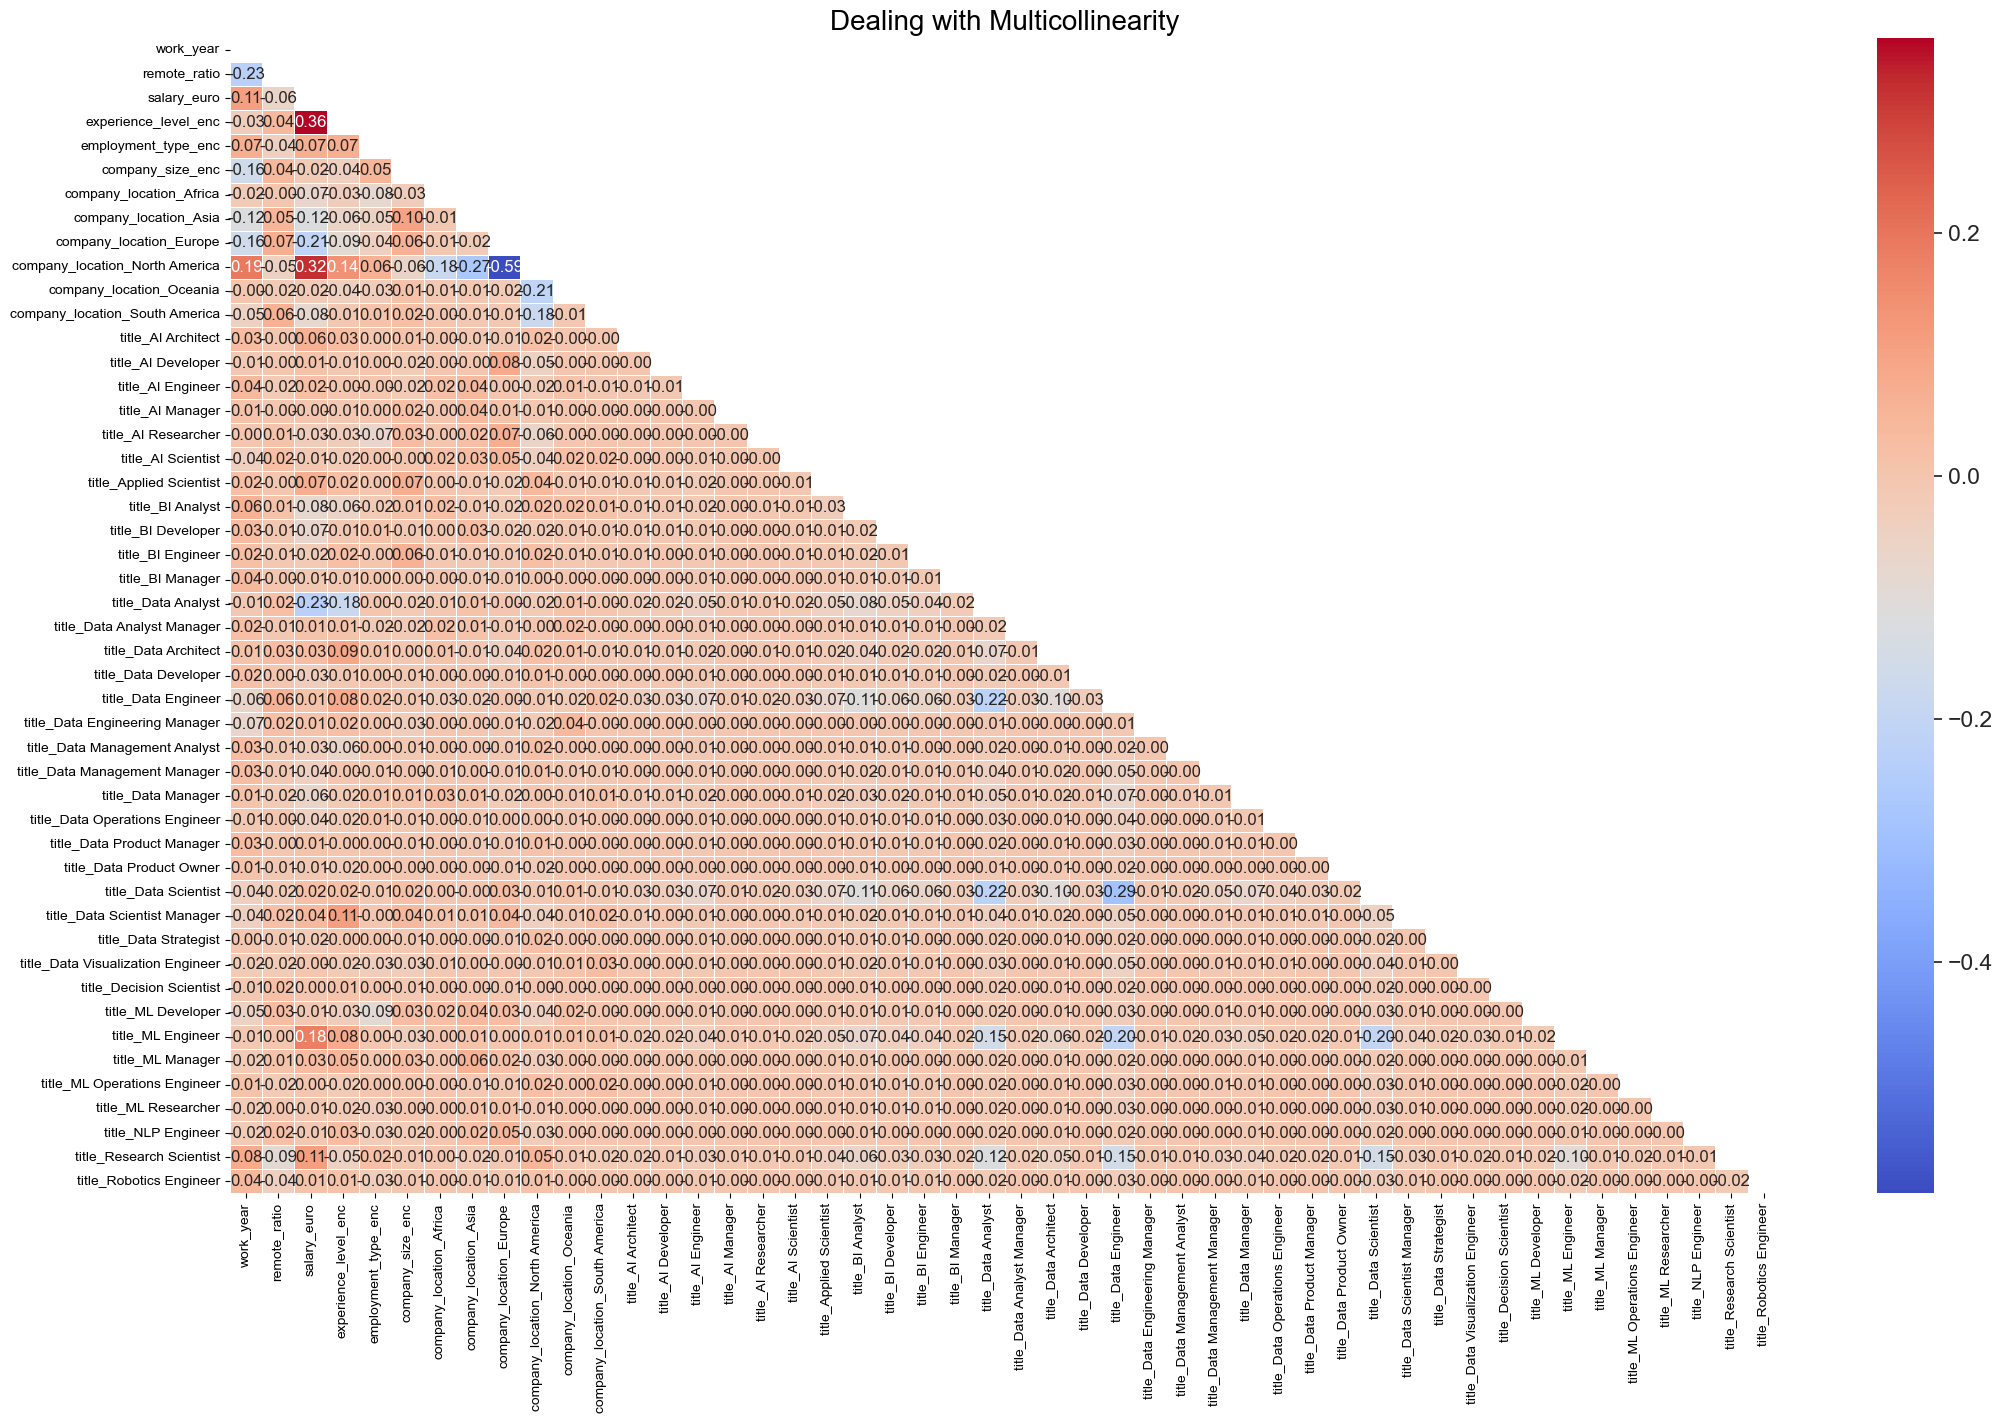

In [73]:
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [74]:
#corr_with_salary = df.corrwith(df["salary_euro"]).sort_values(ascending=False)
corr_with_salary = df.corrwith(df["salary_euro"]).sort_values(ascending=False, key=np.abs)

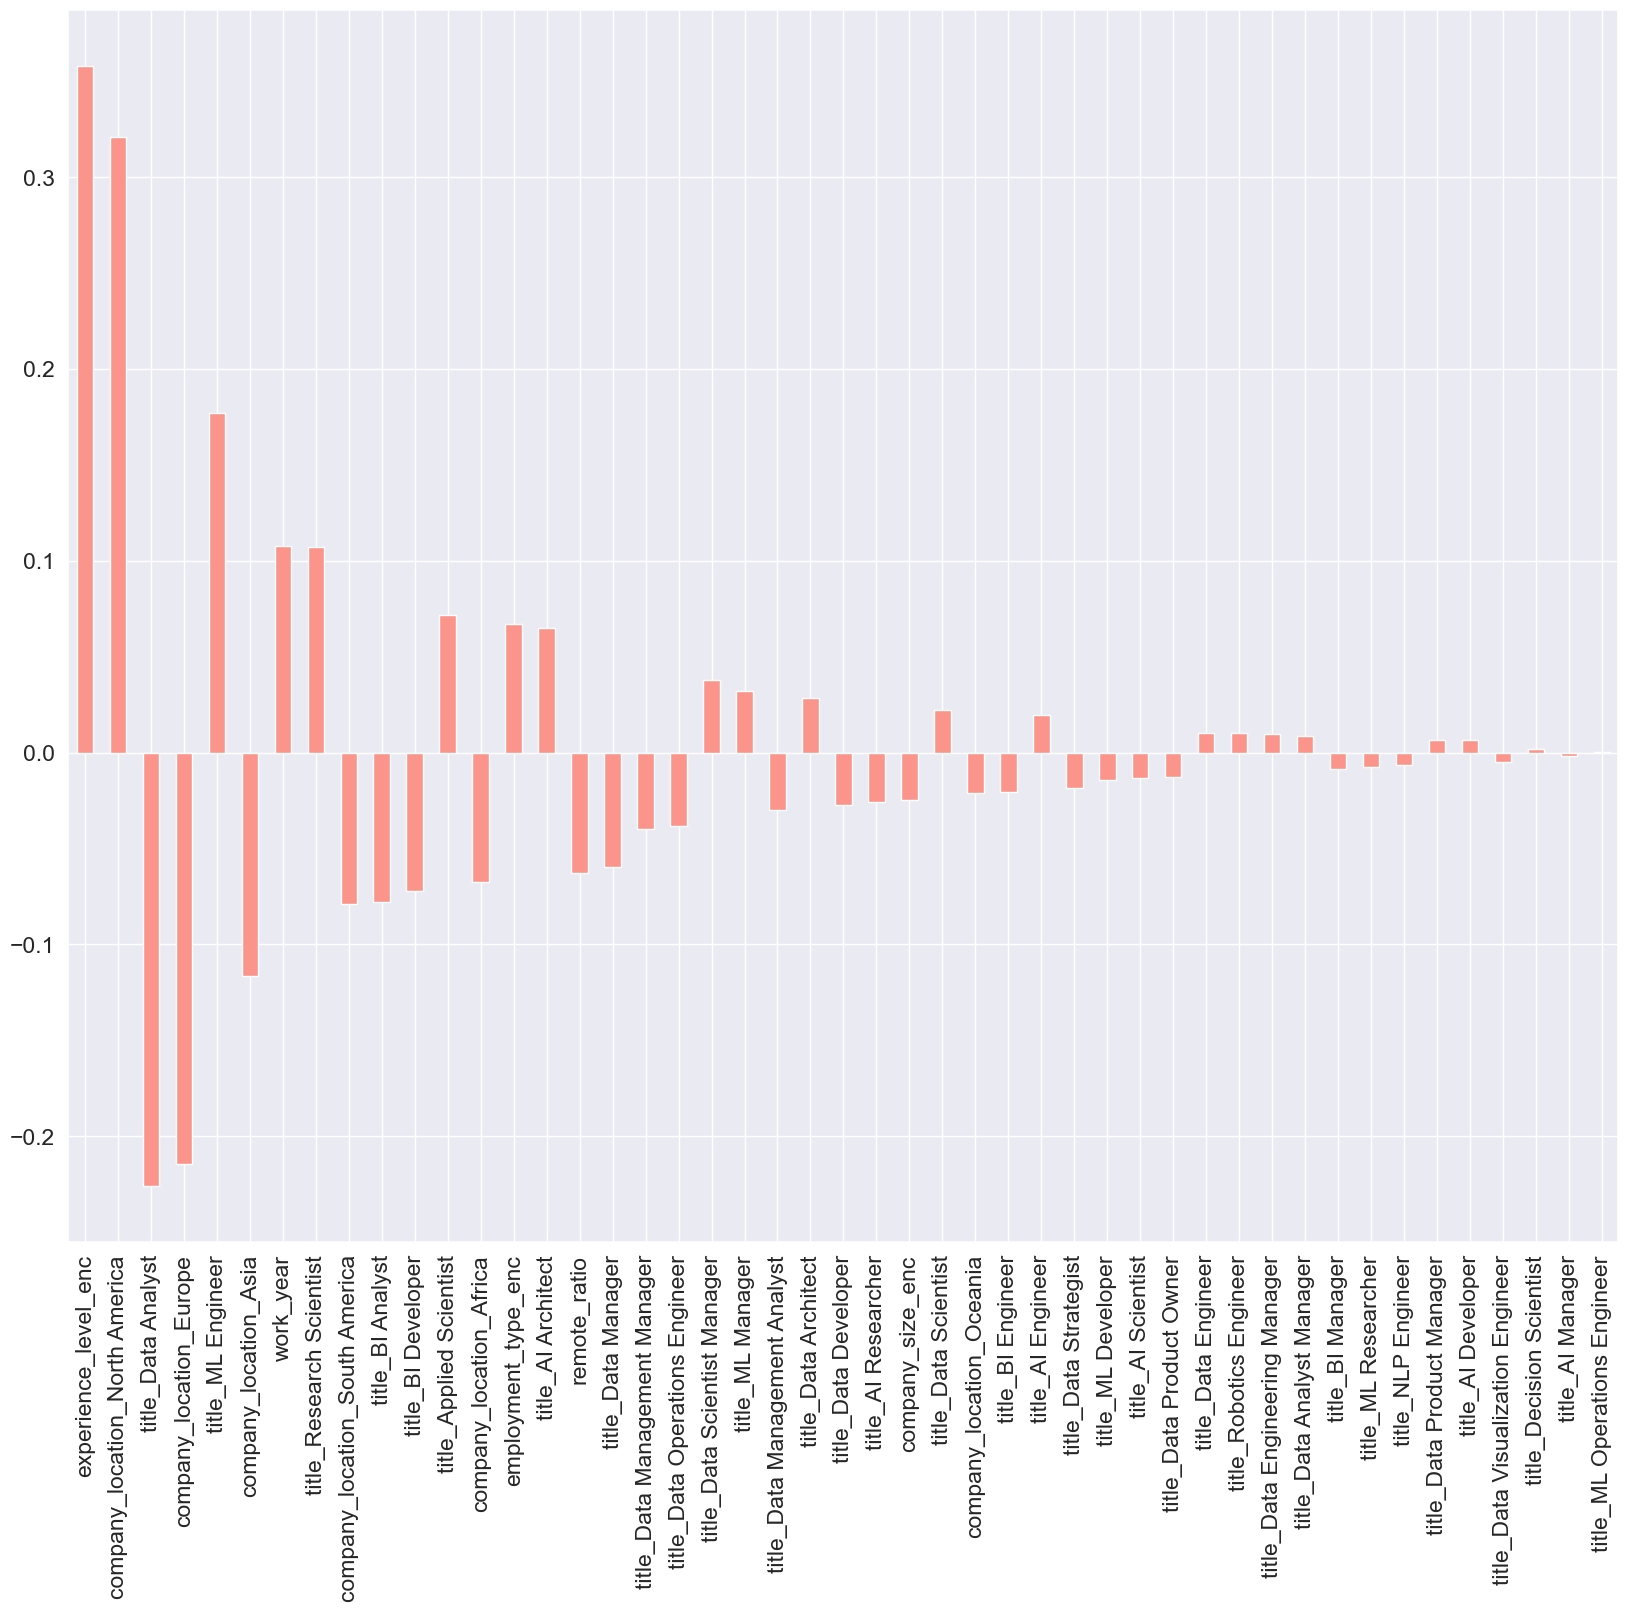

In [75]:
plt.figure(figsize=(20,16))
corr_with_salary.drop("salary_euro").plot.bar(color = '#fb958b')
plt.show();

<h3 style="color: #ff6f69">Moving Target to Right</h3>

In [76]:
target = df.pop('salary_euro')

In [77]:
df['salary_euro'] = target

<h3 style="color: #FF6347;">X-y Split</h3>

In [78]:
X = df.drop('salary_euro',axis=1)
y = df.salary_euro

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h3 style="color: #ff00ff;">1. Linear Regression</h3>

In [80]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [81]:
y_pred_linear = model.predict(X_test)

In [82]:
r2_1 = r2_score(y_test, y_pred_linear)
RMSE_1 = mean_squared_error(y_test, y_pred_linear, squared=False)
MSE_1 = mean_squared_error(y_test, y_pred_linear)
MAE_1 = mean_absolute_error(y_test, y_pred_linear)

print("R2 = ", round(r2_1, 4))
print("RMSE = ", round(RMSE_1, 4))
print("MSE =  ", round(MSE_1, 4)) 
print("MAE = ", round(MAE_1, 4))

R2 =  0.2723
RMSE =  58795.4762
MSE =   3456908024.7305
MAE =  42017.8418


<h3 style="color: #ff00ff;">2. Ridge</h3>

In [83]:
from sklearn.linear_model import Ridge

In [84]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [85]:
predictions_ridge = ridge.predict(X_test)

In [86]:
r2_2 = r2_score(y_test, predictions_ridge)
RMSE_2 = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_2 = mean_squared_error(y_test, predictions_ridge)
MAE_2 = mean_absolute_error(y_test, predictions_ridge)

print("R2 = ", round(r2_2, 4))
print("RMSE = ", round(RMSE_2, 4))
print("MSE =", round(MSE_2, 4))
print("MAE = ", round(MAE_2, 4))

R2 =  0.2733
RMSE =  58755.8076
MSE = 3452244922.8932
MAE =  41987.1465


<h3 style="color: #ff00ff;">3. Lasso</h3>

In [87]:
from sklearn.linear_model import Lasso

In [88]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [89]:
predictions_lasso = lasso.predict(X_test)

In [90]:
r2_3 = r2_score(y_test, predictions_lasso)
RMSE_3 = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_3 = mean_squared_error(y_test, predictions_lasso)
MAE_3 = mean_absolute_error(y_test, predictions_lasso)

print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE = ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.2726
RMSE =  58784.3047
MSE =  3455594477.4221
MAE =  42009.9248


In [91]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.2723440895095932
Train data accuracy:  0.30140705603903484


<h3 style="color: #ff00ff;">4. Decision Tree</h3>

In [92]:
from sklearn.tree import DecisionTreeRegressor

In [93]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [94]:
predictions_tree = tree.predict(X_test)

In [95]:
r2_4 = r2_score(y_test, predictions_tree)
RMSE_4 = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_4 = mean_squared_error(y_test, predictions_tree)
MAE_4 = mean_absolute_error(y_test, predictions_tree)

print("R2 = ", round(r2_4, 4))
print("RMSE = ", round(RMSE_4, 4))
print("MSE = ", round(MSE_4, 4))
print("MAE = ", round(MAE_4, 4))

R2 =  0.2293
RMSE =  60508.6182
MSE =  3661292882.0813
MAE =  43371.7365


<h3 style="color: #ff00ff;">5. KNN</h3>

In [96]:
from sklearn.neighbors import KNeighborsRegressor

In [97]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [98]:
predictions_knn = knn.predict(X_test)

In [99]:
r2_5 = r2_score(y_test, predictions_knn)
RMSE_5 = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_5 = mean_squared_error(y_test, predictions_knn)
MAE_5 = mean_absolute_error(y_test, predictions_knn)

In [100]:
print("R2 = ", round(r2_5, 4))
print("RMSE = ", round(RMSE_5, 4))
print("The value of the metric MSE is ", round(MSE_5, 4))
print("MAE = ", round(MAE_5, 4))

R2 =  0.1761
RMSE =  62563.3463
The value of the metric MSE is  3914172301.2993
MAE =  44815.2918


<h3 style="color: #ff00ff;">6. GXBoost</h3>

In [101]:
import xgboost as xgb

In [102]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [103]:
predictions_xgb = xgbr.predict(X_test)

In [104]:
r2_6 = r2_score(y_test, predictions_xgb)
RMSE_6 = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_6 = mean_squared_error(y_test, predictions_xgb)
MAE_6 = mean_absolute_error(y_test, predictions_xgb)

print("R2 = ", round(r2_6, 4))
print("RMSE = ", round(RMSE_6, 4))
print("The value of the metric MSE is ", round(MSE_6, 4))
print("MAE = ", round(MAE_6, 4))

R2 =  0.2633
RMSE =  59161.2196
The value of the metric MSE is  3500049904.067
MAE =  42305.6323


<h3 style="color: #ff00ff;">7. Random Forest</h3>

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [107]:
predictions_random_forest = model.predict(X_test)

In [108]:
r2_7 = r2_score(y_test, predictions_random_forest)
RMSE_7 = mean_squared_error(y_test, predictions_random_forest, squared=False)
MSE_7 = mean_squared_error(y_test, predictions_random_forest)
MAE_7 = mean_absolute_error(y_test, predictions_random_forest)

#Printing the results
print("R2 = ", round(r2_7, 4))
print("RMSE = ", round(RMSE_7, 4))
print("MSE = ", round(MSE_7, 4))
print("MAE = ", round(MAE_7, 4))

R2 =  0.2545
RMSE =  59511.5223
MSE =  3541621284.378
MAE =  42715.014


In [109]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost','Random Forest'],
    'R²': [r2_1, r2_2, r2_3, r2_4, r2_5, r2_6, r2_7],
    'RMSE': [RMSE_1, RMSE_2, RMSE_3, RMSE_4, RMSE_5, RMSE_6, RMSE_7],
    'MSE': [MSE_1, MSE_2, MSE_3, MSE_4, MSE_5, MSE_6, MSE_7],
    'MAE': [MAE_1, MAE_2, MAE_3, MAE_4, MAE_5, MAE_6, MAE_7]
}

In [110]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model")

,R²,RMSE,MSE,MAE
Model,,,,
Linear Regression,0.272344,58795.476227,3.456908e+09,42017.841839
Ridge,0.273326,58755.807567,3.452245e+09,41987.146450
Lasso,0.272621,58784.304686,3.455594e+09,42009.924793
Decision Tree,0.229322,60508.618246,3.661293e+09,43371.736468
KNN,0.176093,62563.346308,3.914172e+09,44815.291769
XGBoost,0.263263,59161.219596,3.500050e+09,42305.632272
Random Forest,0.254513,59511.522282,3.541621e+09,42715.013958


In [111]:
eval_df = pd.DataFrame({"actual":y_test,"pred":predictions_lasso})

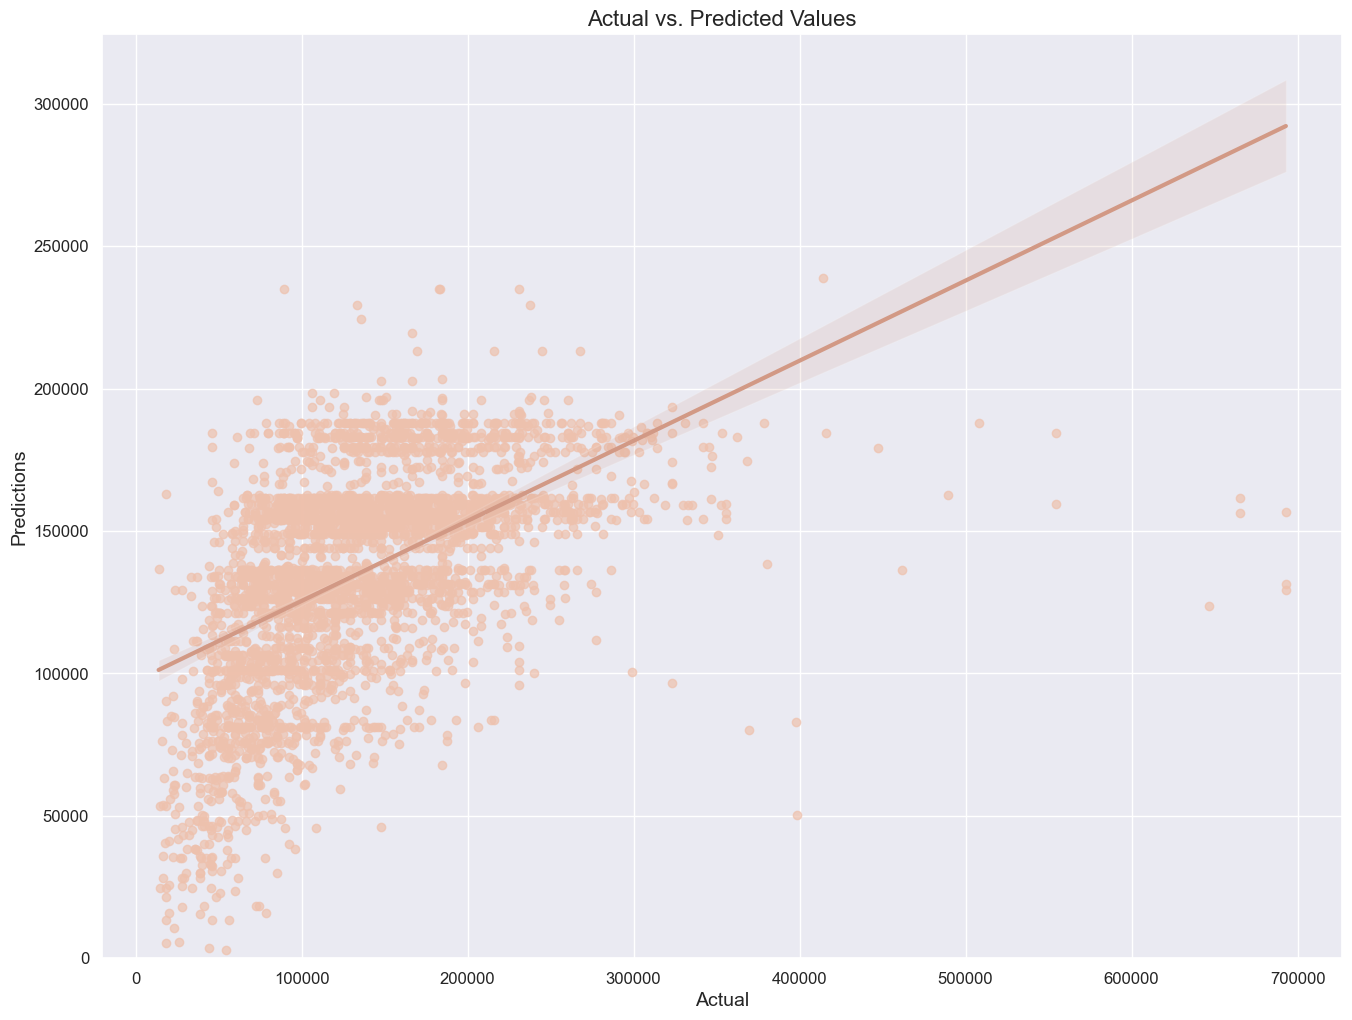

In [112]:
scatter_color = "#eec1ad"
line_color = "#d29985"

plt.figure(figsize=(16, 12))

sns.regplot(x='actual', y='pred', data=eval_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<h3 style="color: #ff00ff;">Normalization</h3>

In [113]:
from sklearn.preprocessing import MinMaxScaler 

In [114]:
scaler = MinMaxScaler()

In [115]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
model = Ridge()
model.fit(X_train_scaled, y_train)

Ridge()

In [117]:
predictions_Ridge2 = model.predict(X_test_scaled)

In [118]:
r2_3_2 = r2_score(y_test, predictions_Ridge2)
RMSE_3_2 = mean_squared_error(y_test, predictions_Ridge2, squared=False)
MSE_3_2 = mean_squared_error(y_test, predictions_Ridge2)
MAE_3_2 = mean_absolute_error(y_test, predictions_Ridge2)

#Printing the results
print("R2 = ", round(r2_3_2, 4))
print("RMSE = ", round(RMSE_3_2, 4))
print("MSE = ", round(MSE_3_2, 4))
print("MAE = ", round(MAE_3_2, 4))

R2 =  0.2733
RMSE =  58756.5247
MSE =  3452329199.3857
MAE =  41987.4066


<h3 style="color: #ff00ff;">Standardization</h3>

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
scaler = StandardScaler()
X_train_scaled3 = scaler.fit_transform(X_train)
X_test_scaled3 = scaler.transform(X_test)

In [121]:
model = Ridge()
model.fit(X_train_scaled3, y_train)

Ridge()

In [122]:
predictions_Ridge3 = model.predict(X_test_scaled3)

In [123]:
r2_3_3 = r2_score(y_test,predictions_Ridge3)
RMSE_3_3 = mean_squared_error(y_test,predictions_Ridge3, squared=False)
MSE_3_3 = mean_squared_error(y_test,predictions_Ridge3)
MAE_3_3 = mean_absolute_error(y_test,predictions_Ridge3)

#Printing the results
print("R2 = ", round(r2_3_3, 4))
print("RMSE = ", round(RMSE_3_3, 4))
print("MSE = ", round(MSE_3_3, 4))
print("MAE = ", round(MAE_3_3, 4))

R2 =  0.2723
RMSE =  58795.3687
MSE =  3456895380.1085
MAE =  42017.7368


<h3 style="color: #ff00ff;">Dealing with Outliers</h3>

In [124]:
Q1 = df['salary_euro'].quantile(0.25)
Q3 = df['salary_euro'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df[(df['salary_euro'] >= lower_bound) & (df['salary_euro'] <= upper_bound)]

In [125]:
y = df_clean.salary_euro
X = df_clean.drop(['salary_euro'],axis=1)

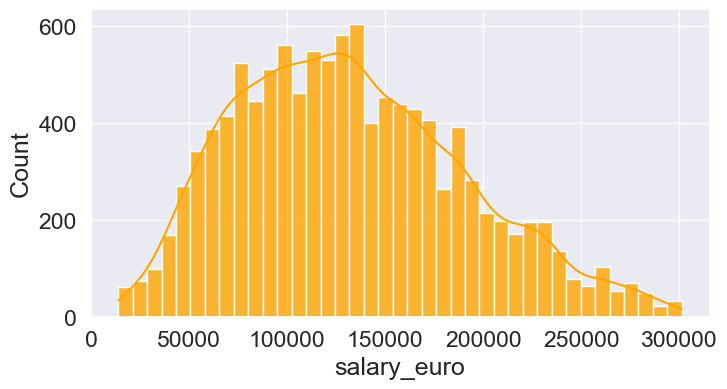

In [126]:
plt.figure(figsize=(8, 4))
sns.histplot(df_clean["salary_euro"], alpha=0.8,color='orange', kde=True);

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [128]:
model = Ridge()
model.fit(X_train, y_train)

Ridge()

In [129]:
predictions_Ridge4 = model.predict(X_test)

In [130]:
R2_3_4 = r2_score(y_test, predictions_Ridge4)
RMSE_3_4 = mean_squared_error(y_test, predictions_Ridge4,squared=False)
MSE_3_4 = mean_squared_error(y_test, predictions_Ridge4)
MAE_3_4 = mean_absolute_error(y_test, predictions_Ridge4)

print("R2=:", round(R2_3_4,4))
print("RMSE = ", round(RMSE_3_4,4))
print("MSE = ", round(MSE_3_4, 4))
print("MAE = ", round(MAE_3_4, 4))

R2=: 0.3269
RMSE =  47551.7823
MSE =  2261171995.739
MAE =  38022.2283


In [131]:
eval_df2 = pd.DataFrame({"actual":y_test,"pred":predictions_Ridge4})

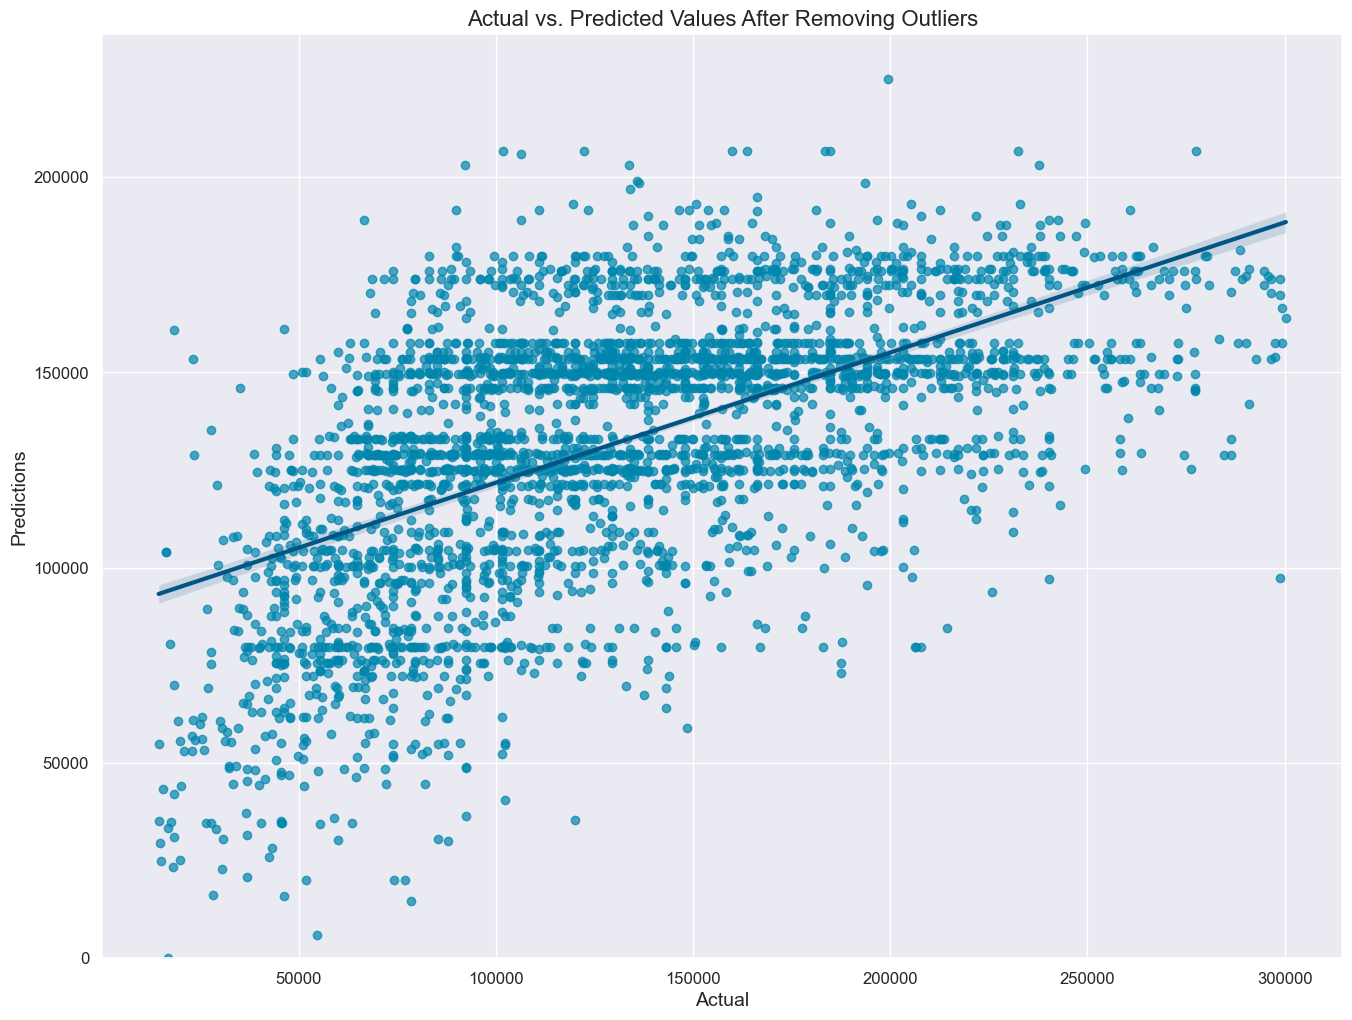

In [132]:
scatter_color = "#0086ad"
line_color = "#005582"

plt.figure(figsize=(16, 12))

sns.regplot(x='actual', y='pred', data=eval_df2,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values After Removing Outliers', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()